# Jannics explore notebook
First, mount google drive:

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
MODEL_ROOT = "/content/drive/MyDrive/ieee_big_data_cup_2023/models/"
DATA_ROOT = "/content/drive/MyDrive/ieee_big_data_cup_2023/data/"

Mounted at /content/drive


In [2]:
#!pip install -Uqq ipdb
#import ipdb
#%pdb on

In [3]:
# import libraries and declare global settings:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize, edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

# hack to get tqdm print one line in colab
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

Next, append systems path so we can import custom functions:

a bunch of utility functions, eventually to be moved elsewhere

In [4]:
sys.path.append("/content/drive/MyDrive/ieee_big_data_cup_2023/src")

In [5]:
# all string constants
class Dims:
  class Materials:
    MATERIAL_NAME = "material name"
    INDEX = "index of the material"
    ATOMIC_NUMBER = "atomic number Z"
    DENSITY = "density (g * cm-3)"
    RADIATION_LENGTH ="radiation length (g * cm-2)"

  class Sensors:
    SC_A_0_X= "sc_a_0_x"
    SC_A_0_Y= "sc_a_0_y"
    SC_A_0_Z= "sc_a_0_z"
    SC_A_1_X= "sc_a_1_x"
    SC_A_1_Y= "sc_a_1_y"
    SC_A_1_Z= "sc_a_1_z"
    SC_B_0_X= "sc_b_0_x"
    SC_B_0_Y= "sc_b_0_y"
    SC_B_0_Z= "sc_b_0_z"
    SC_B_1_X= "sc_b_1_x"
    SC_B_1_Y= "sc_b_1_y"
    SC_B_1_Z= "sc_b_1_z"
    SC_A_0_E= "sc_a_1_E"
    SC_B_0_E= "sc_b_0_E"
    FILE_NAME = "file_name"

In [6]:
from pathlib import Path

from functools import lru_cache
@lru_cache(maxsize = 1)
def read_test_or_train_parquets(file_path: Path):

  df = pd.read_parquet(file_path)
  df = df.rename(columns={
      "col_0": Dims.Sensors.SC_A_0_X,
      "col_1": Dims.Sensors.SC_A_0_Y,
      "col_2": Dims.Sensors.SC_A_0_Z,
      "col_3": Dims.Sensors.SC_A_1_X,
      "col_4": Dims.Sensors.SC_A_1_Y,
      "col_5": Dims.Sensors.SC_A_1_Z,
      "col_6": Dims.Sensors.SC_B_0_X,
      "col_7": Dims.Sensors.SC_B_0_Y,
      "col_8": Dims.Sensors.SC_B_0_Z,
      "col_9": Dims.Sensors.SC_B_1_X,
      "col_10": Dims.Sensors.SC_B_1_Y,
      "col_11": Dims.Sensors.SC_B_1_Z,
      "col_12": Dims.Sensors.SC_A_0_E,
      "col_13": Dims.Sensors.SC_B_0_E,
      })
  return df

import pandas as pd
def get_input_by_index(index: int) -> pd.DataFrame:
  """Returns one example.
  Nominated for the ugly function award :)"""
  if not isinstance(index, int):
    raise TypeError("Index needs to be an integer")

  if not 0 <= index < 20000:
    raise ValueError(f"Index needs to be in [0,20000), not {index}")

  if index < 1000:
    file_path = "batch_training_data_1/0_data.parquet"
  elif 1000 <= index < 2000:
    file_path = "batch_training_data_1/1_data.parquet"
  elif 2000 <= index < 3000:
    file_path = "batch_training_data_1/2_data.parquet"
  elif 3000 <= index < 4000:
    file_path = "batch_training_data_1/3_data.parquet"
  elif 4000 <= index < 5000:
    file_path = "batch_training_data_1/4_data.parquet"
  elif 5000 <= index < 6000:
    file_path = "batch_training_data_2/5_data.parquet"
  elif 6000 <= index < 7000:
    file_path = "batch_training_data_2/6_data.parquet"
  elif 7000 <= index < 8000:
    file_path = "batch_training_data_2/7_data.parquet"
  elif 8000 <= index < 9000:
    file_path = "batch_training_data_2/8_data.parquet"
  elif 9000 <= index < 10000:
    file_path = "batch_training_data_2/9_data.parquet"
  elif 10000 <= index < 11000:
    file_path = "batch_training_data_3/10_data.parquet"
  elif 11000 <= index < 12000:
    file_path = "batch_training_data_3/11_data.parquet"
  elif 12000 <= index < 13000:
    file_path = "batch_training_data_3/12_data.parquet"
  elif 13000 <= index < 14000:
    file_path = "batch_training_data_3/13_data.parquet"
  elif 14000 <= index < 15000:
    file_path = "batch_training_data_3/14_data.parquet"
  elif 15000 <= index < 16000:
    file_path = "batch_test_data_1/15_data.parquet"
  elif 16000 <= index < 17000:
    file_path = "batch_test_data_1/16_data.parquet"
  elif 17000 <= index < 18000:
    file_path = "batch_test_data_1/17_data.parquet"
  elif 18000 <= index < 19000:
    file_path = "batch_test_data_1/18_data.parquet"
  elif 19000 <= index < 20000:
    file_path = "batch_test_data_1/19_data.parquet"

  df = read_test_or_train_parquets(DATA_ROOT+"parquet/"+file_path)
  df = df[df[Dims.Sensors.FILE_NAME] == index]
  del df[Dims.Sensors.FILE_NAME]
  return df

import numpy as np
import pandas as pd
from functools import lru_cache
@lru_cache(maxsize=1)
def read_ground_truth_data(file_path: Path)-> dict[int, np.array]:
  """reads all ground truth files in one folder"""
  return np.load(file_path, allow_pickle=True)[()]


def get_ground_truth_file(number: int) -> np.array:
  """Returns a ground truth array for the given example"""
  if number not in range(0, 15000):
    raise ValueError(f"Trainings data ranges from 0 to 14999, there is no file for {number}")

  if number < 5000:
    batch = 1
  elif 5000 <= number < 10000:
    batch = 2
  else:
    batch = 3

  data = read_ground_truth_data(DATA_ROOT+f"training_ground_truth_{batch}.npy")
  return data.get(number)

from functools import lru_cache
@lru_cache
def get_materials_data() -> pd.DataFrame:
  columns = [Dims.Materials.MATERIAL_NAME, Dims.Materials.INDEX,
             Dims.Materials.ATOMIC_NUMBER, Dims.Materials.DENSITY,
             Dims.Materials.RADIATION_LENGTH]
  materials = pd.read_csv(DATA_ROOT+"materials.csv", header=None)
  materials.columns = columns
  return materials

In [7]:
get_materials_data()

,material name,index of the material,atomic number Z,density (g * cm-3),radiation length (g * cm-2)
0,AIR,0,NaN,0.001,36.620
1,Mg,1,12.000,1.740,25.030
2,Al,2,13.000,2.699,24.010
3,Si,3,14.000,2.329,21.820
4,S,4,16.000,2.000,19.500
5,Ca,5,20.000,1.550,16.140
6,Mn,6,25.000,7.440,14.640
7,Fe,7,26.000,7.874,13.840
8,Ni,8,28.000,8.902,12.680
9,Mo,9,42.000,10.220,9.800


In [8]:
df = get_input_by_index(12345)
df.head(2)

,sc_a_0_x,sc_a_0_y,sc_a_0_z,sc_a_1_x,sc_a_1_y,sc_a_1_z,sc_b_0_x,sc_b_0_y,sc_b_0_z,sc_b_1_x,sc_b_1_y,sc_b_1_z,sc_a_1_E,sc_b_0_E
0,0.161,-0.003,0.703,0.176,-0.044,0.504,0.243,-0.243,-0.457,0.258,-0.288,-0.673,0.017,0.011
1,0.126,-0.286,0.743,0.083,-0.238,0.509,-0.096,-0.037,-0.467,-0.132,0.003,-0.663,0.019,0.020


We have the x, y and z coordinates of the four points where a scintallator registered a muon and the energy before and above it went through the material. Note that, as expected the minimum and maximum of the x and y dimensions is -0.3 and 0.3 (spanning a 60 cm x 60cm grid) and the z values are the expected height:

In [9]:
#df.describe()

We can directly view the ground truth:

In [10]:
#get_ground_truth_file(12345)

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import pandas as pd

def plot_ground_truth(index: int):

  label_df: pd.DataFrame = get_materials_data().filter([Dims.Materials.INDEX,
                                                        Dims.Materials.MATERIAL_NAME])
  label_dict = dict(zip(label_df[Dims.Materials.INDEX],
                            label_df[Dims.Materials.MATERIAL_NAME]))

  intersection_matrix = get_ground_truth_file(number=index)
  unique_values = list(np.unique(intersection_matrix))

  max_val = 40

  # Create a colormap for each label
  num_labels = len(label_dict)
  label_colors = sns.color_palette("hls", len(label_dict))
  label_colors[0] = (0.95, 0.95, 0.95)  # White color for value 0

  color_map = ListedColormap(label_colors)

  # Convert matrix values to corresponding colormap indices
  colormap_indices = np.zeros_like(intersection_matrix, dtype=int)
  for i in range(max_val):
      for j in range(max_val):
          label = intersection_matrix[i, j]
          colormap_indices[i, j] = label

  # Plot the colored matrix using Seaborn's heatmap
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(colormap_indices, cmap=color_map, linewidths=0.01, linecolor="lightgrey", cbar=False)

  # Create custom legend patches
  legend_patches = [Patch(color=color, label=label_dict[i]) for i, color in enumerate(label_colors)]

  # Add legend to the plot
  plt.legend(handles=legend_patches, title="Material", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.title(f"Ground truth of example {index}")
  plt.show()

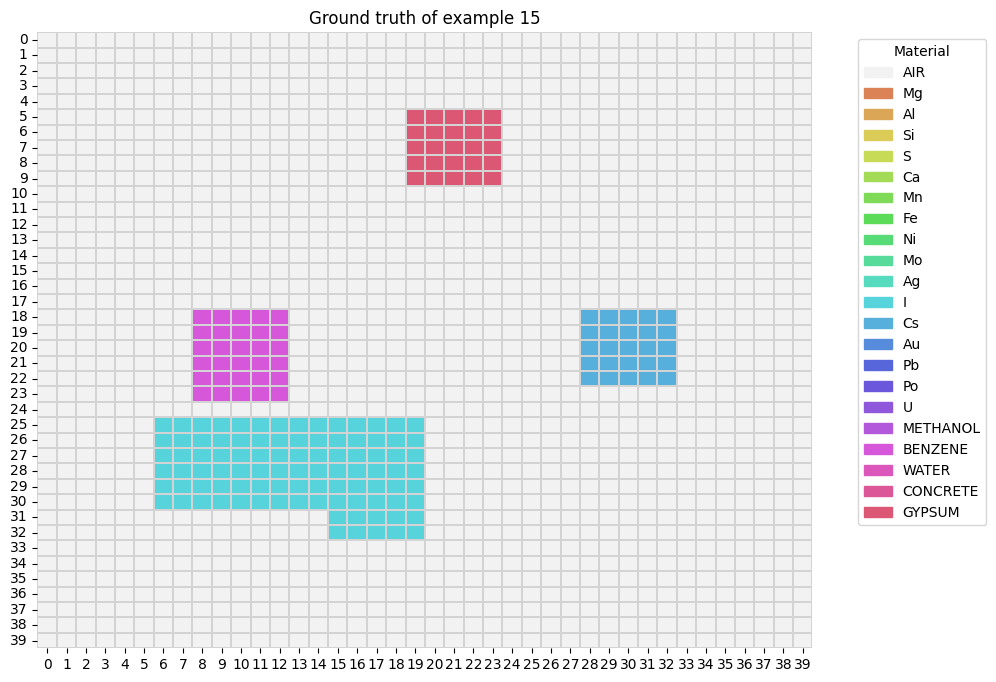

In [12]:
plot_ground_truth(15)

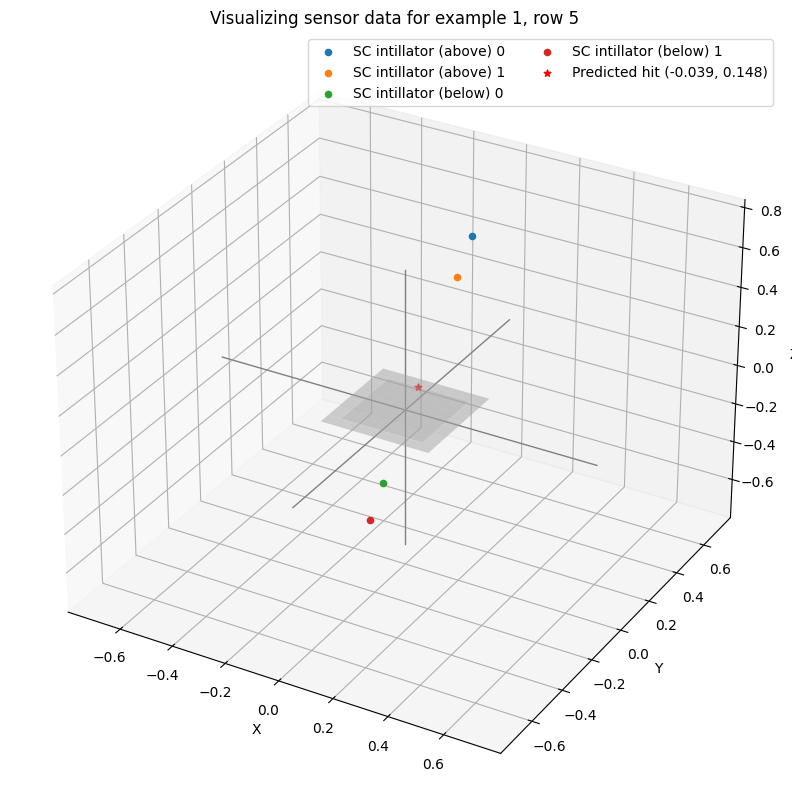

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import scipy.optimize as opt

def plot_example_data(df: pd.DataFrame,
                      example_row: tuple[int,int],
                      plot_mesh: bool = True,
                      plot_0: bool =True,
                      plot_connecting_lines: bool= True):
  # Create a 3D plot
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')

  # Plot sensor locations
  x = df['sc_a_0_x']
  y = df['sc_a_0_y']
  z = df['sc_a_0_z']
  ax.scatter(x, y, z, label=f'SC intillator (above) 0')

  x = df['sc_a_1_x']
  y = df['sc_a_1_y']
  z = df['sc_a_1_z']
  e = df['sc_a_1_E']
  ax.scatter(x, y, z, label=f'SC intillator (above) 1')
  #ax.text(x,y,z, "here is data", color='red', fontsize=10)

	#sc_b_0_E
  x = df['sc_b_0_x']
  y = df['sc_b_0_y']
  z = df['sc_b_0_z']
  ax.scatter(x, y, z, label=f'SC intillator (below) 0')

  x = df['sc_b_1_x']
  y = df['sc_b_1_y']
  z = df['sc_b_1_z']
  ax.scatter(x, y, z, label=f'SC intillator (below) 1')


  if plot_mesh:
    # Plot a horizontal plane at z=0
    xx, yy = np.meshgrid(np.linspace(-0.2, 0.2, 10), np.linspace(-.2, .2, 10))
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, color='lightgrey', alpha=0.5)
    xx, yy = np.meshgrid(np.linspace(-0.15, 0.15, 10), np.linspace(-.15, .15, 10))
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, color='lightgrey', alpha=0.25)

  if plot_connecting_lines:
    data = df
    point_a = np.array([data['sc_a_0_x'], data['sc_a_0_y'], data['sc_a_0_z']])
    point_b = np.array([data['sc_b_0_x'], data['sc_b_0_y'], data['sc_b_0_z']])
    direction_vector = point_b - point_a
    t = -point_a[2] / direction_vector[2]
    target_a_x = point_a[0] + t * direction_vector[0]
    target_a_y = point_a[1] + t * direction_vector[1]
    ax.scatter(target_a_x[0], target_a_y[0], 0, color='red', s=25, label=f'Predicted hit ({target_a_x[0]:.3f}, {target_a_y[0]:.3f})', marker="*")

  if plot_0:
    # Add red lines for the coordinate system
    length = 0.7
    ax.plot([-length, length], [0, 0], [0, 0], color='grey', linewidth=1)
    ax.plot([0, 0], [-length, length], [0, 0], color='grey', linewidth=1)
    ax.plot([0, 0], [0, 0], [-length, length], color='grey', linewidth=1)

  # Set labels and legend
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.legend(ncol=2)
  plt.title(f"Visualizing sensor data for example {example_row[0]}, row {example_row[1]}")
  plt.show()


plot_example_data(df.iloc[[15]], (1,5))

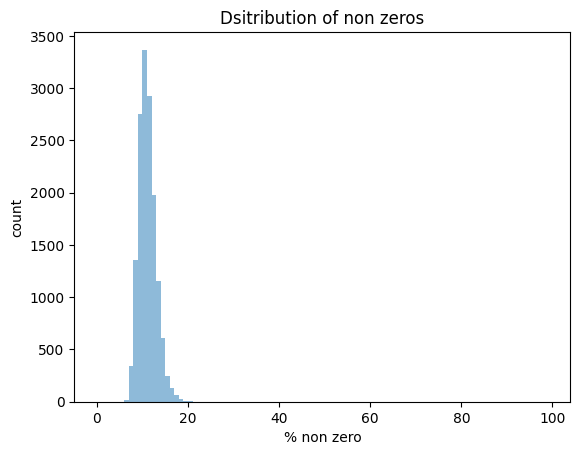

In [14]:
# fixed bin size
non_zeros = []
for index in range(15000):
  array = get_ground_truth_file(index)
  non_zeros.append(np.count_nonzero(array)/1600*100)

bins = np.arange(0, 100, 1) # fixed bin size
from matplotlib import pyplot as plt
plt.hist(non_zeros, bins=bins, alpha=0.5)
plt.title('Dsitribution of non zeros')
plt.xlabel('% non zero')
plt.ylabel('count')
plt.show()

In [15]:
def add_target(df_input: pd.DataFrame):
  """Adds target x and y cooridnates to frame. drops outliers"""
  df = pd.DataFrame(df_input, copy=True)
  df['t_0'] = -df['sc_a_0_z'] / (df['sc_a_1_z'] - df['sc_a_0_z'])
  df['target_x_a'] = df['sc_a_0_x'] + df['t_0'] * (df['sc_a_1_x'] - df['sc_a_0_x'])
  df['target_y_a'] = df['sc_a_0_y'] + df['t_0'] * (df['sc_a_1_y'] - df['sc_a_0_y'])

  df['t_0'] = -df['sc_b_0_z'] / (df['sc_b_1_z'] - df['sc_b_0_z'])
  df['target_x_b'] = df['sc_b_0_x'] + df['t_0'] * (df['sc_b_1_x'] - df['sc_b_0_x'])
  df['target_y_b'] = df['sc_b_0_y'] + df['t_0'] * (df['sc_b_1_y'] - df['sc_b_0_y'])

  df['delta_E'] = df[Dims.Sensors.SC_A_0_E]-df[Dims.Sensors.SC_B_0_E]

  df['delta_E_rel'] = df['delta_E']/df[Dims.Sensors.SC_B_0_E]

  df['target_x'] = (df['target_x_a']+df['target_x_b'])/2
  df['target_y'] = (df['target_y_a']+df['target_y_b'])/2

  # keep only those in the 40 by 40 grid , this drops 12% of observations
  threshold = 0.2
  df = df[df['target_x']<threshold]
  df = df[df['target_y']<threshold]
  df = df[df['target_x']>=-threshold]
  df = df[df['target_y']>=-threshold]

  df['diff_x'] = df['target_x_a']-df['target_x_b']
  df['diff_y'] = df['target_y_a']-df['target_y_b']
  df['diff'] = np.sqrt(df['diff_x']**2+df['diff_y']**2)

  # drops those where different targets as computed from a or b are further
  # apart than rounding error would allow
  df = df[df['diff']< 0.0141]
  return df

In [16]:
import pandas as pd
import numpy as np
def add_angles(df: pd.DataFrame):
    # Calculate direction vectors for each line
    dir_a_x = df['sc_a_1_x'] - df['sc_a_0_x']
    dir_a_y = df['sc_a_1_y'] - df['sc_a_0_y']
    dir_a_z = df['sc_a_1_z'] - df['sc_a_0_z']

    dir_b_x = df['sc_b_1_x'] - df['sc_b_0_x']
    dir_b_y = df['sc_b_1_y'] - df['sc_b_0_y']
    dir_b_z = df['sc_b_1_z'] - df['sc_b_0_z']

    # Calculate the angle between the direction vectors
    dot_product = dir_a_x*dir_b_x + dir_a_y*dir_b_y + dir_a_z*dir_b_z
    magnitude_a = np.sqrt(dir_a_x**2 + dir_a_y**2 + dir_a_z**2)
    magnitude_b = np.sqrt(dir_b_x**2 + dir_b_y**2 + dir_b_z**2)

    cos_theta = dot_product / (magnitude_a * magnitude_b)
    angle_in_radian = np.arccos(cos_theta)
    angle_in_degrees = np.degrees(np.arccos(cos_theta))

    # Adding the angle_in_degrees column to the dataframe
    df['angle_in_degrees'] = angle_in_degrees
    df['angle_in_radian'] = angle_in_radian

In [17]:
# df = read_test_or_train_parquets(DATA_ROOT+"parquet/"+"batch_training_data_1/0_data.parquet")
# df = add_target(df)
# add_angles(df)
# df.head(2)

In [18]:
#df[['target_x', 'target_y','diff', 'angle_in_radian', 'angle_in_degrees']].describe(percentiles=[0.1,0.5,0.9,0.95]+list(np.linspace(0.99,1,10))).T

In [19]:
#df[df['diff']< 0.548][['diff', 'angle_in_radian', 'angle_in_degrees']].corr()

In [20]:
#df[df['diff']< 0.0141].shape

Let us view one example:

First we add the target coordinates:

In [21]:
df.head(2)

,sc_a_0_x,sc_a_0_y,sc_a_0_z,sc_a_1_x,sc_a_1_y,sc_a_1_z,sc_b_0_x,sc_b_0_y,sc_b_0_z,sc_b_1_x,sc_b_1_y,sc_b_1_z,sc_a_1_E,sc_b_0_E
0,0.161,-0.003,0.703,0.176,-0.044,0.504,0.243,-0.243,-0.457,0.258,-0.288,-0.673,0.017,0.011
1,0.126,-0.286,0.743,0.083,-0.238,0.509,-0.096,-0.037,-0.467,-0.132,0.003,-0.663,0.019,0.020


Note that we have lost quite some observations:

In [22]:
df.shape

(41150, 14)

In [23]:
add_angles(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df.head(2)

,sc_a_0_x,sc_a_0_y,sc_a_0_z,sc_a_1_x,sc_a_1_y,sc_a_1_z,sc_b_0_x,sc_b_0_y,sc_b_0_z,sc_b_1_x,sc_b_1_y,sc_b_1_z,sc_a_1_E,sc_b_0_E,angle_in_degrees,angle_in_radian
0,0.161,-0.003,0.703,0.176,-0.044,0.504,0.243,-0.243,-0.457,0.258,-0.288,-0.673,0.017,0.011,0.356,0.006
1,0.126,-0.286,0.743,0.083,-0.238,0.509,-0.096,-0.037,-0.467,-0.132,0.003,-0.663,0.019,0.020,0.057,0.001


In [25]:
import pandas as pd
import numpy as np

def encode_variable_to_grid(
      df: pd.DataFrame,
      variables: list[str],
      grid_size: int=600
    ) -> np.array:

    num_channels = len(variables) * 4  # mean, median, max and countfor each variable
    grid = np.full((grid_size, grid_size, num_channels), np.NaN)
    values_list = [[[[] for _ in range(len(variables))] for _ in range(grid_size)] for _ in range(grid_size)]

    # Calculate the scaling factor based on the grid size
    scaling_factor = grid_size / 0.4  # The range of x and y is [-0.2, 0.2]

    # Scale x and y to grid
    df['x_grid'] = (df['target_x'] + 0.2) * scaling_factor
    df['y_grid'] = (df['target_y'] + 0.2) * scaling_factor

    df = df[df['x_grid'] < grid_size]
    df = df[df['y_grid'] < grid_size]

    for _, row in df.iterrows():
        y = int(row['x_grid'])
        x = int(row['y_grid'])

        for i, variable in enumerate(variables):
            # Update the lists
            values_list[x][y][i].append(row[variable])

    for x in range(grid_size):
        for y in range(grid_size):
            for i, variable in enumerate(variables):
                if values_list[x][y][i]:
                    # Assign mean
                    grid[x, y, i] = np.nanmean(values_list[x][y][i])
                    # Assign median
                    grid[x, y, i + len(variables)] = np.nanmedian(values_list[x][y][i])
                    # Assign max
                    grid[x, y, i + 2*len(variables)] = np.nanmax(values_list[x][y][i])
                    # assign count
                    grid[x, y, i + 3*len(variables)] = len(values_list[x][y][i])

    return grid


In [26]:
def generate_features(index: int,  grid_size:int, variables) -> np.array:
  df_raw = get_input_by_index(index)
  df = add_target(df_raw)
  add_angles(df)
  return  encode_variable_to_grid(df, variables=variables, grid_size = grid_size)

In [27]:
def get_input_data(index: int,  grid_size:int, variables: list):
  return generate_features(index, grid_size, variables)

def get_output_data(index: int):
  return get_ground_truth_file(index)

In [28]:
examples = get_input_data(15, grid_size=200, variables=['angle_in_radian'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-96463ffcf8f2>:37: RuntimeWarning: Mean of empty slice
  grid[x, y, i] = np.nanmean(values_list[x][y][i])
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-25-96463ffcf8f2>:41: RuntimeWarning: All-NaN axis encountered
  grid[x, y, i + 2*len(variables)] = np.nanmax(values_list[x][y][i])


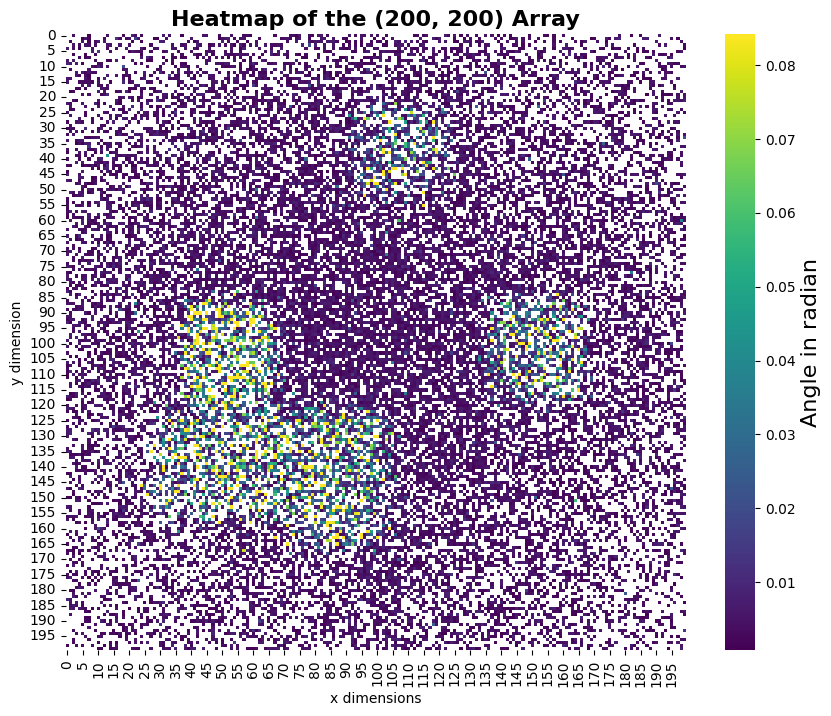

In [29]:
example = examples[:, :, 2]
def plot_heatmap(arr,  cbar_label=None):
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(arr, cmap='viridis', cbar=True, robust=True)

  plt.title(f"Heatmap of the {arr.shape} Array", fontsize=16, fontweight='bold')
  plt.xlabel("x dimensions")  # set x label
  plt.ylabel("y dimension")  # set y label

  if cbar_label:
    cbar = ax.collections[0].colorbar
    cbar.set_label(cbar_label, fontsize=16)  # Adjust fontsize if needed

  plt.show()
plot_heatmap(example, "Angle in radian")

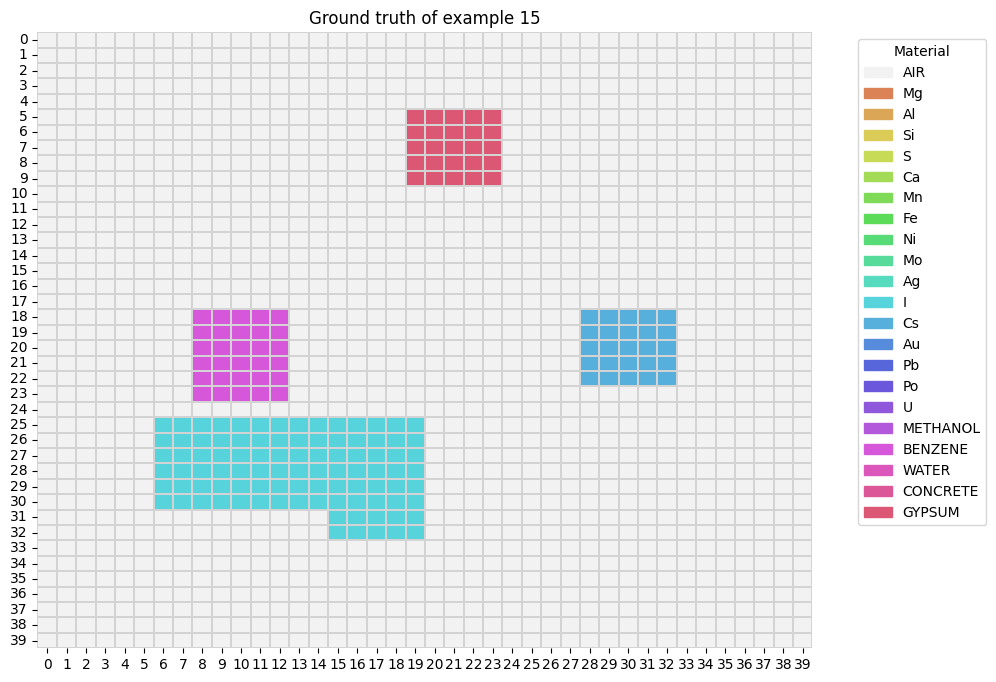

In [30]:
plot_ground_truth(15)

In [31]:
grid_size = 200
output_folder = Path(DATA_ROOT, f"XY_{grid_size}_angle_count_more_filtering")
output_folder.mkdir(exist_ok=True)
output_data_file_name = Path(output_folder, "output_data.npz")
n_examples = 15000
if False:
  # output data
  pbar = tqdm(range(n_examples))
  output_data = np.array([get_output_data(i) for i in pbar])
  output_data = output_data.reshape((n_examples, 40, 40, 1))

  np.savez(output_data_file_name, output_data=output_data)
  print(f"saved {output_data_file_name}.npz")

  batches = [15,16,17,18,19]#[0,1, 2,3,4,5,6,7,8,9,10,11,12,13,14]
  pbar_batches = tqdm(batches)
  for batch in pbar_batches:
    lower = batch * 1000
    upper = lower + 1000
    pbar = tqdm(range(lower, upper))
    pbar.set_description(f"working on {lower} -> {upper}")
    variables = ['angle_in_radian']
    input_data = np.array([get_input_data(i, grid_size, variables) for i in pbar])

    input_data = input_data.reshape((1000, grid_size, grid_size, len(variables)*4 ))
    input_data_file_name = Path(output_folder, f"input_data_{batch}.npz")
    np.savez(input_data_file_name, input_data=input_data)
    print(f"saved: {input_data_file_name}")

Now we read in the data. 15,000 ground truths and 15,000+5,000 sets of inputs.


In [32]:
import gc
gc.collect()

#output data
with np.load(output_data_file_name) as data:
    output_data = data['output_data']
output_data.shape

def read_input_data(file_indexes: list[int]):
  # input data
  input_data = []
  pbar = tqdm(file_indexes)
  for batch in pbar:
    input_data_file_name = Path(output_folder, f"input_data_{batch}.npz")
    with np.load(input_data_file_name) as data:
      input_data_batch = data['input_data']
      input_data = input_data + [input_data_batch]
  input_data = np.vstack(input_data)
  return input_data

In [33]:
input_data_final_file_name = Path(output_folder, f"input_data_final_float16.npz")

In [34]:
#input_data = read_input_data(range(0,15))
#input_data.shape
#input_data = input_data.astype(np.float16)
#np.savez(input_data_final_file_name, input_data=input_data)

In [35]:
with np.load(input_data_final_file_name) as data:
    input_data = data['input_data']

In [36]:
import gc
gc.collect()

22

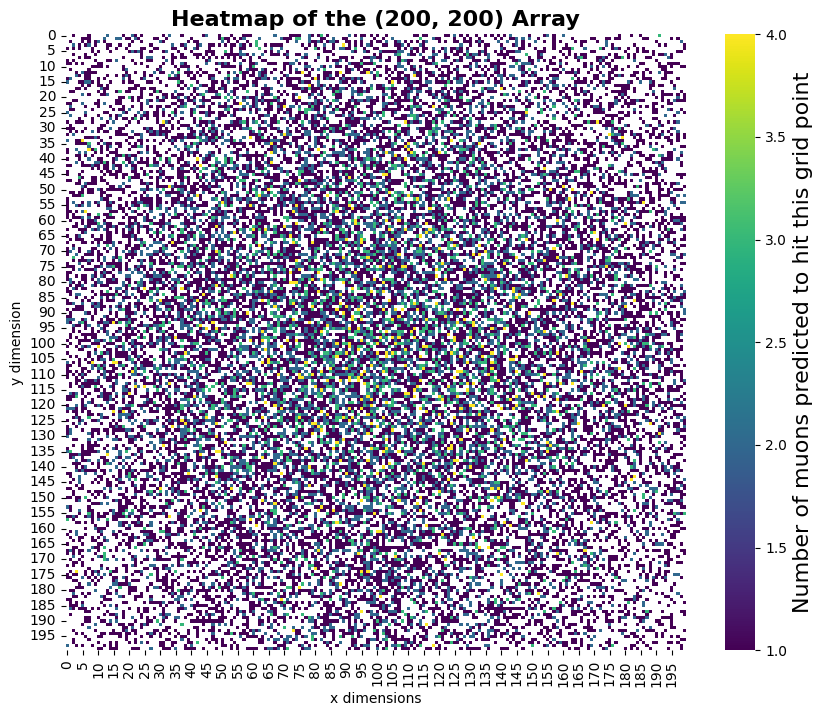

In [37]:
example = input_data[15,:, :, 3]
plot_heatmap(example, "Number of muons predicted to hit this grid point")

In [38]:
#example = input_data[15,:, :, 1]
#plot_heatmap(example, "Median angle in a given cell (white=missing)")

In [39]:
#plot_ground_truth(10)

In [40]:
import numpy as np

def downscale_wgtd_avg(array, weights, K):
    if array.shape[1] != 200 or array.shape[2] != 200 or weights.shape[1] != 200 or weights.shape[2] != 200:
        raise ValueError("Both array and weights must have shape (N, 200, 200).")

    scale_factor = 200 // K

    # Define a function to handle the pooling operation
    def pool_channel(data, wgt):
        # Reshape for pooling
        reshaped_data = data.reshape(data.shape[0], K, scale_factor, K, scale_factor)
        reshaped_wgt = wgt.reshape(wgt.shape[0], K, scale_factor, K, scale_factor)

        # Compute the weighted average
        sum_weights = np.nansum(reshaped_wgt, axis=(2, 4))
        sum_weights[sum_weights == 0] = 1  # Avoid division by zero
        weighted_avg = np.nansum(reshaped_data * reshaped_wgt, axis=(2, 4)) / sum_weights

        return weighted_avg

    # Apply pooling operation to the channel using weights
    downscaled_channel = pool_channel(array, weights)

    return downscaled_channel[..., np.newaxis]

# Example usage:
array = np.random.rand(10, 200, 200)
weights = np.random.rand(10, 200, 200)

downscaled_array = downscale_wgtd_avg(array, weights, 40)
print(downscaled_array.shape)  # It should now correctly print (10, 40, 40)

(10, 40, 40, 1)


In [41]:
import numpy as np

def downscale_wgtd_median(array, weights, K):
    if array.shape[1] != 200 or array.shape[2] != 200 or weights.shape[1] != 200 or weights.shape[2] != 200:
        raise ValueError("Both array and weights must have shape (N, 200, 200).")

    scale_factor = 200 // K

    # Function to compute the weighted median
    # Function to compute the weighted median
    def weighted_median_vectorized(data, weight) -> float:
        data_flat = data.flatten()
        weight_flat = np.nan_to_num(weight).flatten().astype(int)

        # Repeat each element of data according to the corresponding weight
        weighted_data = np.repeat(data_flat, weight_flat)

        return np.nanmedian(weighted_data)


    # Define a function to handle the pooling operation
    def pool_channel(data, wgt):
        # Reshape for pooling
        reshaped_data = data.reshape(data.shape[0], K, scale_factor, K, scale_factor)
        reshaped_wgt = wgt.reshape(wgt.shape[0], K, scale_factor, K, scale_factor)

        # Apply weighted median for each pooling window
        median_result = np.empty((data.shape[0], K, K))
        pbar = tqdm(range(data.shape[0]))
        for n in pbar:
          for i in range(K):
              for j in range(K):
                    median_result[n, i, j] = weighted_median_vectorized(reshaped_data[n, i, :, j, :], reshaped_wgt[n, i, :, j, :])

        return median_result

    # Apply pooling operation to the channel using weights
    downscaled_channel = pool_channel(array, weights)

    return downscaled_channel[..., np.newaxis]


In [42]:
import numpy as np

def downscale(array, K, func):
    if array.shape[1] != 200 or array.shape[2] != 200:
        raise ValueError("Expected input dimensions (N, 200, 200, 1), but got {}".format(array.shape))

    def pool_channel(channel):
        # Reshape channel for pooling
        reshaped = channel.reshape(array.shape[0], K, 200//K, K, 200//K)
        # Apply the function on the pooling dimensions
        pooled = func(reshaped, axis=(2, 4))
        return pooled

    # Apply pooling operation to the channel
    downscaled_channel = pool_channel(array)

    return downscaled_channel[..., np.newaxis]

def downscale_weighted(arr, K):
  list_of_arrays = [
      downscale_wgtd_avg(arr[:,:,:,0], arr[:,:,:,3], K),
      downscale_wgtd_median(arr[:,:,:,1], arr[:,:,:,3], K),
      downscale(arr[:,:,:,2], K, np.nanmax),
      downscale(arr[:,:,:,3], K, np.nansum),
  ]

  return np.concatenate(list_of_arrays, axis=-1)

In [43]:
#input_data[0:100,:,:,:].shape

In [44]:
#example = downscale_weighted(input_data[0:100,:,:,:], 40)
#example.shape

In [45]:
#input_data[:,: ,: ,1].shape

In [46]:
input_data.shape

(15000, 200, 200, 4)

In [47]:
def replace_nans(arr):
  return np.nan_to_num(arr)

In [48]:
def preprocess_data(arr):
    # Replace NaN values in the fourth channel with 0 in-place
    fourth_channel = arr[:, :, :, 3]
    fourth_channel[np.isnan(fourth_channel)] = 0

    # Pre-allocate a new array of shape (N, K, K, 5)
    new_shape = list(arr.shape)
    new_shape[-1] = 5
    new_arr = np.zeros(new_shape, dtype=arr.dtype)

    # Fill in the first four channels
    new_arr[:, :, :, :4] = arr

    # Fill in the fifth channel in-place
    new_arr[:, :, :, 4] = np.where(fourth_channel == 0, 1, 0)

    return np.nan_to_num(new_arr, nan=-1)


In [49]:
input_data_downscaled_file = Path(output_folder, "input_data_new_missing_channel.npz")
recompute=False

if recompute:
  input_data_downscaled = preprocess_data(input_data)
  np.savez(input_data_downscaled_file, input_data_downscaled= input_data_downscaled)
else:
  with np.load(input_data_downscaled_file) as data:
      input_data_downscaled = data['input_data_downscaled']

In [50]:
input_data = input_data_downscaled
input_data.shape

(15000, 200, 200, 5)

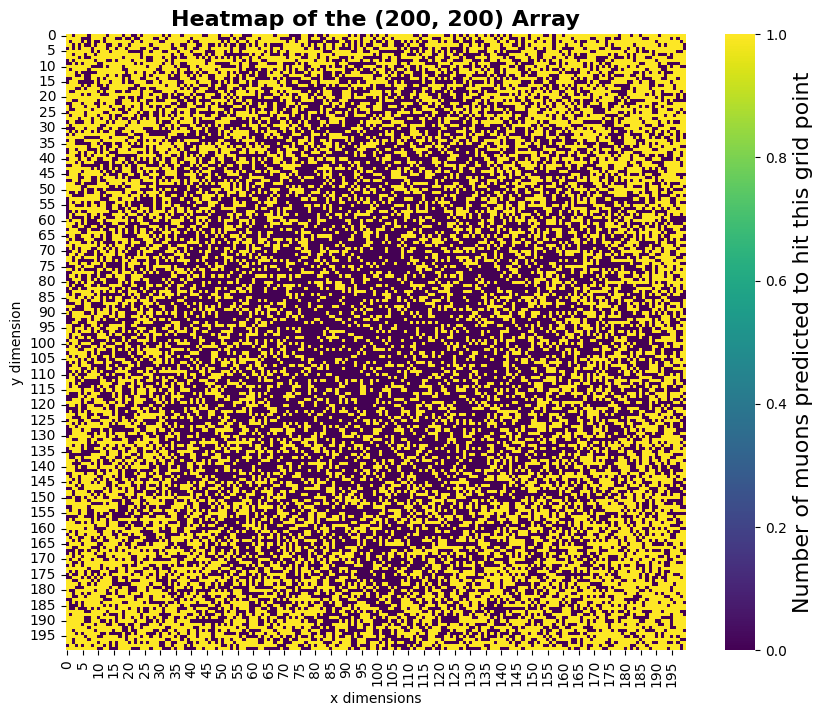

In [51]:
plot_heatmap(input_data[15,:,:,4], "Number of muons predicted to hit this grid point")

In [52]:
input_data = input_data[:15000]

In [53]:
print(f"input data size (training) {input_data.shape}: {round(input_data.nbytes/1024/1024)} MB")
print(f"output data size {output_data.shape}: {round(output_data.nbytes/1024/1024)} MB")

input data size (training) (15000, 200, 200, 5): 5722 MB
output data size (15000, 40, 40, 1): 183 MB


In [54]:
import numpy as np

def one_hot_encode(arr, num_classes):
    """
    One-hot encodes a 4D array with shape (samples, height, width, 1) and integers from 0 to num_classes-1.

    Parameters:
        arr (np.ndarray): Input array of shape (samples, height, width, 1).
        num_classes (int): Number of classes for one-hot encoding.

    Returns:
        np.ndarray: One-hot encoded array of shape (samples, height, width, num_classes).
    """

    # Extract shape information from input array
    samples, height, width, _ = arr.shape

    # Initialize an array of zeros with shape (samples, height, width, num_classes)
    one_hot = np.zeros((samples, height, width, num_classes))

    # Use advanced indexing to populate the one-hot encoded array
    one_hot[np.arange(samples)[:, None, None, None],
            np.arange(height)[None, :, None, None],
            np.arange(width)[None, None, :, None],
            arr.astype(int)] = 1

    return one_hot

Next, we define the model:

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, UpSampling2D, concatenate, Dropout

def create_u2net(input_shape=(200, 200, 4), num_classes=22, dropout_rate=0.2, l2_reg=1e-5, filter_n = 32):
    inputs = Input(shape=input_shape)

    def conv_block(x, filters, kernel_size=(3, 3), activation='relu', batch_norm=True):
        x = Conv2D(filters, kernel_size, padding='same',
                   kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        if batch_norm:
            x = BatchNormalization()(x)
        x = Activation(activation)(x)
        return x

    # Encoder
    e1 = conv_block(inputs,filter_n)
    e1 = conv_block(e1, filter_n*2)
    e1 = conv_block(e1, filter_n*4)
    p1 = MaxPooling2D((5, 5))(e1)

    e2 = conv_block(p1, filter_n*8)
    e2 = conv_block(e2, filter_n*8)
    p2 = MaxPooling2D((2, 2))(e2)

    e3 = conv_block(p2, filter_n*4)
    e3 = conv_block(e3, filter_n*4)
    p3 = MaxPooling2D((2, 2))(e3)

    # Bridge
    b0 = conv_block(p3, filter_n*8)
    b0 = conv_block(b0, filter_n*8)

    # Decoder
    d0 = UpSampling2D((2, 2))(b0)
    d0 = concatenate([d0, e3])
    d0 = Dropout(dropout_rate)(d0)
    d0 = conv_block(d0, filter_n*8)
    d0 = conv_block(d0, filter_n*6)

    d1 = UpSampling2D((2, 2))(d0)
    d1 = concatenate([d1, e2])
    d1 = Dropout(dropout_rate)(d1)
    d1 = conv_block(d1, filter_n*4)
    d1 = conv_block(d1, filter_n*2)

    # Output
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(d1)

    model = Model(inputs=inputs, outputs=outputs)

    return model

model = create_u2net()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 4)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 200, 32)         1184      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 200, 200, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 200, 200, 32)         0         ['batch_normalization[0][0

Next, we manually define the loss function:

In [56]:
import tensorflow as tf

def set_zero_channel_to_zero(tensor):
    # Create a tensor of zeros with the same shape as the 0th channel of the input tensor
    zero_channel = tf.zeros_like(tensor[..., 0:1])

    # Replace the 0th channel of the input tensor with zeros
    tensor = tf.concat([zero_channel, tensor[..., 1:]], axis=-1)

    return tensor

def find_non_zero_elements(tensor):
    # Reduce the tensor along the spatial dimensions
    # If there's at least one non-zero element in tensor[i, :, :, j], the max will be greater than zero
    reduced_tensor = tf.reduce_max(tensor, axis=[1, 2])

    # Use tf.greater to set each element to 1 if it's greater than 0, and 0 otherwise
    non_zero_tensor = tf.cast(tf.greater(reduced_tensor, 0.0), tf.int32)

    return non_zero_tensor

def custom_iou_loss(y_true, y_pred):
    # Add a small constant to avoid division by zero
    smooth = 1e-6

    # # Convert y_true and y_pred to float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    y_true = set_zero_channel_to_zero(y_true)
    y_pred = set_zero_channel_to_zero(y_pred)

    # find number of distinct categories in either vector so we can divide the end result
    unique_y_true = find_non_zero_elements(y_true)
    unique_y_pred = find_non_zero_elements(y_pred)
    unique_both = unique_y_true+ unique_y_pred
    n_unique = tf.math.count_nonzero(unique_both, axis=1)
    n_unique = tf.cast(n_unique, tf.float32)
    print(f"y_true.shape: {y_true.shape}")

    # Calculate intersection and union per channel
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])  # Shape will be (N, C)
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2]) - intersection  # Shape will be (N, C)

    print(f"union per channel: {union}, intersection per channel: {intersection}")

    # Calculate IoU per channel
    iou_per_channel = intersection  / (union + smooth)  # Shape will be (N, C)

    # Average the IoUs across all channels
    iou = tf.reduce_sum(iou_per_channel, axis=-1)  # Shape will be (N, )

    # Since we want to maximize IoU, we take its negative as the loss
    return -iou/n_unique


In [57]:
input_data_tf = tf.convert_to_tensor(input_data, dtype=tf.float16)
input_data_tf.shape

TensorShape([15000, 200, 200, 5])

In [58]:
output_data_encoded = one_hot_encode(output_data, 22)
output_data_encoded_tf = tf.convert_to_tensor(output_data_encoded, dtype=tf.int32)
output_data_encoded_tf.shape

TensorShape([15000, 40, 40, 22])

In [59]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')

# When fitting the model, add the callback to the callbacks list
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,          # Number of epochs with no improvement
    restore_best_weights=True,  # Restore the best weights when stopping
    verbose=1,             # Print messages
    min_delta=0.0001,
)
filter_n = 2
model_name = f'paper200x200_tuned_{filter_n}.h5'

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    MODEL_ROOT+model_name,      # File to save the best model
    monitor='val_loss',   # Monitor validation loss
    save_best_only=True,  # Save only the best model
    verbose=1             # Print messages
)


compute = True
if compute:
  input_shape = input_data_tf[0].shape
  print(f"input shape is: {input_shape}")
  model = create_u2net(input_shape, filter_n=filter_n)
  model.compile(optimizer='adam', loss=custom_iou_loss)
  history = model.fit(input_data_tf,
                      output_data_encoded_tf,
                      epochs=200,
                      #batch_size=64,
                      batch_size=16,
                      validation_split=0.15,
                      callbacks=[reduce_lr, early_stopping, model_checkpoint])

  model.save(MODEL_ROOT+model_name)

input shape is: (200, 200, 5)
Epoch 1/200
y_true.shape: (None, 40, 40, 22)
union per channel: Tensor("custom_iou_loss/sub:0", shape=(None, 22), dtype=float32), intersection per channel: Tensor("custom_iou_loss/Sum:0", shape=(None, 22), dtype=float32)
y_true.shape: (None, 40, 40, 22)
union per channel: Tensor("custom_iou_loss/sub:0", shape=(None, 22), dtype=float32), intersection per channel: Tensor("custom_iou_loss/Sum:0", shape=(None, 22), dtype=float32)
797/797 [==============================] - ETA: 0s - loss: -0.0037y_true.shape: (None, 40, 40, 22)
union per channel: Tensor("custom_iou_loss/sub:0", shape=(None, 22), dtype=float32), intersection per channel: Tensor("custom_iou_loss/Sum:0", shape=(None, 22), dtype=float32)

Epoch 1: val_loss improved from inf to 0.00009, saving model to /content/drive/MyDrive/ieee_big_data_cup_2023/models/paper200x200_tuned_2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


797/797 [==============================] - 36s 21ms/step - loss: -0.0037 - val_loss: 8.8729e-05 - lr: 0.0010
Epoch 2/200
796/797 [============================>.] - ETA: 0s - loss: -0.0242
Epoch 2: val_loss improved from 0.00009 to -0.02565, saving model to /content/drive/MyDrive/ieee_big_data_cup_2023/models/paper200x200_tuned_2.h5
797/797 [==============================] - 15s 19ms/step - loss: -0.0242 - val_loss: -0.0257 - lr: 0.0010
Epoch 3/200
796/797 [============================>.] - ETA: 0s - loss: -0.0380
Epoch 3: val_loss improved from -0.02565 to -0.02673, saving model to /content/drive/MyDrive/ieee_big_data_cup_2023/models/paper200x200_tuned_2.h5
797/797 [==============================] - 15s 19ms/step - loss: -0.0380 - val_loss: -0.0267 - lr: 0.0010
Epoch 4/200
796/797 [============================>.] - ETA: 0s - loss: -0.0441
Epoch 4: val_loss did not improve from -0.02673
797/797 [==============================] - 15s 19ms/step - loss: -0.0441 - val_loss: -0.0179 - lr: 0.

In [60]:
MODEL_ROOT+model_name

'/content/drive/MyDrive/ieee_big_data_cup_2023/models/paper200x200_tuned_2.h5'

In [61]:
del input_data
del input_data_tf
import gc
gc.collect()

5883

In [62]:
input_data = read_input_data(range(15,20))
input_data.shape
input_data = input_data.astype(np.float16)
gc.collect()

100%|██████████| 5/5 [00:40<00:00,  8.13s/it]


55

In [63]:
input_data_validation = preprocess_data(input_data)
input_data_validation.shape

(5000, 200, 200, 5)

In [64]:
from tensorflow.keras.models import load_model
print(f"loading model {MODEL_ROOT+model_name}")
model = load_model(MODEL_ROOT+model_name, custom_objects={'custom_iou_loss': custom_iou_loss})
input_data_validation_tf = tf.convert_to_tensor(input_data_validation, dtype=tf.float16)
output = model.predict(input_data_validation_tf)
output_unencoded = np.argmax(output, axis=-1)

loading model /content/drive/MyDrive/ieee_big_data_cup_2023/models/paper200x200_tuned_2.h5
157/157 [==============================] - 2s 7ms/step


In [65]:
stack_option = 'columns'
if stack_option == 'columns':
    reshaped_data = output_unencoded.reshape(output_unencoded.shape[0], -1, 40).swapaxes(1,2).reshape(output_unencoded.shape[0], -1)

# Save to CSV using pandas
file_name = Path(DATA_ROOT, "submissions", f"submission_{stack_option}_new_approach_{model_name}.csv")

df = pd.DataFrame(reshaped_data)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [66]:
most_common_value = np.bincount(reshaped_data.flatten()).argmax()
print("The most common value in the array is:", most_common_value)
if most_common_value!=0:
  df = df.replace({most_common_value:0})

The most common value in the array is: 8


In [67]:
import pandas as pd

def process_dataframe(df):
    # Ensure you're working with a copy of the dataframe to avoid modifying the original dataframe in-place
    df = df.copy()

    # Set the first 40*5 and last 4*5 columns to zero
    df.iloc[:, :40*5] = 0
    df.iloc[:, -4*5:] = 0

    # Process the columns in 40 column batches
    for start_col in range(40*5, df.shape[1] - 4*5, 40):
        end_col = start_col + 40
        # Set the first 5 and last 5 columns of the current batch to zero
        df.iloc[:, start_col:start_col+5] = 0
        df.iloc[:, end_col-5:end_col] = 0

    return df

In [68]:
df = process_dataframe(df)

In [69]:
print(f"saved to {file_name}")
df.to_csv(file_name, index=False, header=None)
df.shape

saved to /content/drive/MyDrive/ieee_big_data_cup_2023/data/submissions/submission_columns_new_approach_paper200x200_tuned_2.h5.csv


(5000, 1600)

This is validating the loss function...


In [70]:
def intersection_over_union_numpy_array(y_true: np.array, y_pred: np.array) -> float:
    # Initialize IoU sum
    iou_sum = 0.0
    unique_values = set(np.unique(y_true)).union(set(np.unique(y_pred)))
    n_unique = len(unique_values)-1 if 0 in unique_values else len(unique_values)

    # For each class (ignoring 0)
    for i in range(1, 23):
        # Create a mask for each class

        y_true_mask = (y_true == i).astype(np.float32)
        y_pred_mask = (y_pred == i).astype(np.float32)

        # Compute intersection and union
        intersection = np.sum(y_true_mask * y_pred_mask)
        union = np.sum(y_true_mask) + np.sum(y_pred_mask) - intersection
        print(f"{i}: intersection: {intersection}, union: {union}")

        # Protect against zero division
        if union == 0:
            continue

        iou_sum += intersection / union

    # Return the average IoU across all classes
    return (1/max(n_unique,1)) * iou_sum

In [71]:
import tensorflow as tf
import numpy as np

y_true_np = np.array([[4,0,5],
                      [4,0,0],
                      [4,4,0]]
                     )

y_pred_np = np.array([[4,0,0],
                      [4,0,0],
                      [4,4,0]]
                     )

dim_x, dim_y = y_true_np.shape
num_classes = len(np.unique(y_true_np))
# make it look like our data abov
y_true_np = y_true_np.reshape(1, dim_x, dim_y, 1)
y_pred_np = y_pred_np.reshape(1, dim_x, dim_y, 1)
y_true_np = one_hot_encode(y_true_np, 22)
y_pred_np = one_hot_encode(y_pred_np, 22)
# Cast the tensors to float32 for the custom_iou_loss function
y_true = tf.convert_to_tensor(y_true_np, tf.float32)
y_pred = tf.convert_to_tensor(y_pred_np, tf.float32)
custom_iou_loss(y_true, y_pred).numpy()

y_true.shape: (1, 3, 3, 22)
union per channel: [[0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], intersection per channel: [[0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


array([-0.5], dtype=float32)

In [72]:
y_true_np.shape

(1, 3, 3, 22)